## Análisis de las importaciones peruanas

### Antecendentes

Se analiza las [importaciones peruanas](https://www.sunat.gob.pe/estadisticasestudios/nota_tributaria/cdro_F4.xlsx) segun continente y pais de origen desde el año 2005 al 2023, la informacion se obtuvo de la SUNAT (Superintendencia Nacional de Aduanas y de Administración Tributaria).
El análisis cubre la recuperacion de datos de una base datos, la manipulacion, el cálculo y la visualizacion de datos asi como la respuesta a preguntas comerciales.

El análisis se basa principalmente en Python con un poco de SQL

Se utiliza **pandas** para la manipulacion de datos, **sqlite3** para acceder a la base de datos y **matplotlib**/**seaborn** para la visualizacion.

In [14]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

### Recuperando los datos y explorando la base de datos

Los datos se almacenan en una base de datos SQLite 'database.db'. Exploremos la base de datos para ver qué tablas están disponibles.

In [15]:
conn = sqlite3.connect('database.db')
pd.read_sql('SELECT name FROM sqlite_master',conn)

,name
0,importaciones_pe


Solo se tiene una tabla 'importaciones_pe'. Ahora veamos que columnas contiene esta tabla

In [16]:
pd.read_sql('PRAGMA table_info(importaciones_pe)',conn)

,cid,name,type,notnull,dflt_value,pk
0,0,CONTINENTE,TEXT,0,None,0
1,1,PAÍS DE ORIGEN,TEXT,0,None,0
2,2,2005,REAL,0,None,0
3,3,2006,REAL,0,None,0
4,4,2007,REAL,0,None,0
5,5,2008,REAL,0,None,0
6,6,2009,REAL,0,None,0
7,7,2010,REAL,0,None,0
8,8,2011,REAL,0,None,0
9,9,2012,REAL,0,None,0


La tabla se encuentra organizado en un formato ancho, las columnas 'continente' y 'país de origen' tienen variables categóricas y las columnas del '2005 al 2023' varibles numericas o continuas.

Necesitaremos todas las columnas de la tabla

In [17]:
query = "SELECT * FROM importaciones_pe"
importaciones_peru = pd.read_sql_query(query, conn)
conn.close()
importaciones_peru.head()

,CONTINENTE,PAÍS DE ORIGEN,2005,2006,2007,2008,2009,2010,2011,2012,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,AFRICA,BENIN,250039.142,436263.164,863989.675,180912.768,736770.816,219417.321,207595.093,0.000,...,0.000,0.000,0.000,0.000,0.000,25.073,0.000,72351.066,290945.925,653301.330
1,AFRICA,BURKINA FASO,996912.905,1839607.587,5403647.574,2589595.658,169829.070,0.000,6569.170,62917.316,...,816.405,62531.582,116464.630,0.000,52.440,1035.717,403.372,7351.635,1049.864,256.107
2,AFRICA,CABO VERDE,3.487,0.000,286.182,40.904,2325.001,18276.205,0.000,41.324,...,773362.166,55841.621,5890.714,761.232,433549.146,639.529,7226.076,1595.359,39093.703,27626.068
3,AFRICA,COSTA DE MARFIL,257252.547,115247.187,852800.760,91206.047,432972.568,367385.220,500534.620,886764.980,...,416772.210,926393.940,2195008.098,2845548.413,3471450.571,0.000,0.000,0.000,0.000,0.000
4,AFRICA,COTE D'IVOIRE,0.000,187308.715,283524.801,519057.639,40448.493,695849.835,922315.195,423414.485,...,408969.733,0.000,0.000,0.000,0.000,490470.306,399368.084,842048.849,2241570.094,3192671.506


La tabla tiene un formato ancho. Convertimos la tabla en un formato largo y los valores de importacion de la tabla las dividimos por un millon para expresarlo en millones de U$$

In [18]:
importacion_peru = pd.melt(importaciones_peru, id_vars=['CONTINENTE', 'PAÍS DE ORIGEN'], var_name='AÑO', 
                               value_name='IMPORTACION (millones de US$)')

In [19]:
importacion_peru['IMPORTACION (millones de US$)'] = importacion_peru['IMPORTACION (millones de US$)']/1e6
importacion_peru.head()

,CONTINENTE,PAÍS DE ORIGEN,AÑO,IMPORTACION (millones de US$)
0,AFRICA,BENIN,2005,0.250039
1,AFRICA,BURKINA FASO,2005,0.996913
2,AFRICA,CABO VERDE,2005,0.000003
3,AFRICA,COSTA DE MARFIL,2005,0.257253
4,AFRICA,COTE D'IVOIRE,2005,0.000000


### ¿Cual ha sido la evolucion de las importaciones peruanas?

**La evolución de las importaciones en Perú ha mostrado un aumento constante en general, con tres caídas significativas en los años 2019,2020 y 2023.** 

Agrupamos los datos por año e importacion

In [20]:
importacion_peru_evol = importacion_peru.groupby('AÑO')['IMPORTACION (millones de US$)'].sum().reset_index()

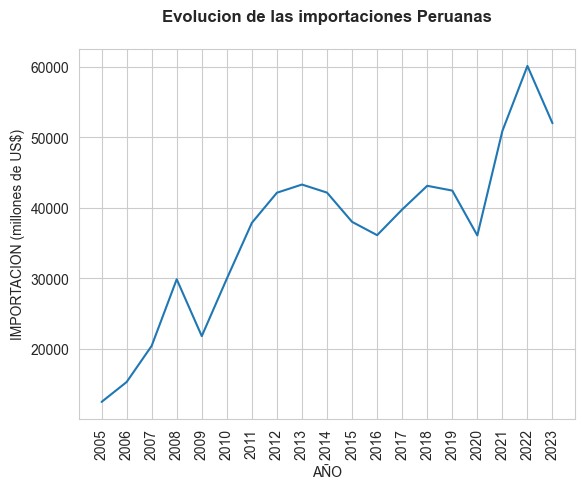

In [8]:
sns.set_style('whitegrid')
sns.lineplot(data=importacion_peru_evol, x='AÑO', y='IMPORTACION (millones de US$)')
plt.title('Evolucion de las importaciones Peruanas', fontweight='bold', pad=20)
plt.xticks(rotation=90)
plt.show()

### ¿Cuáles son los principales países de origen de las importaciones en Perú?

- Agrupamos los datos por continente y país de origen
- Sumamos las importaciones anuales por país
- Ordenamos la tabla segun las importaciónes en orden descendente

In [21]:
importacion_pais = importacion_peru.groupby(['CONTINENTE','PAÍS DE ORIGEN'])\
                                            ['IMPORTACION (millones de US$)'].sum().reset_index()
importacion_pais = importacion_pais.sort_values('IMPORTACION (millones de US$)', ascending=False)
importacion_pais.head(10)

,CONTINENTE,PAÍS DE ORIGEN,IMPORTACION (millones de US$)
127,ASIA,CHINA,149339.427570
81,AMÉRICA,ESTADOS UNIDOS,138991.047799
70,AMÉRICA,BRASIL,44736.971794
62,AMÉRICA,ARGENTINA,28440.432588
93,AMÉRICA,MEXICO,27571.935239
79,AMÉRICA,ECUADOR,25511.549875
74,AMÉRICA,COLOMBIA,23533.346009
73,AMÉRICA,CHILE,22380.658311
139,ASIA,JAPON,19916.563509
174,EUROPA,ALEMANIA,19391.154499


**Perú importa principalmente de China y Estados Unidos, con una notable diferencia respecto a los demás países.**

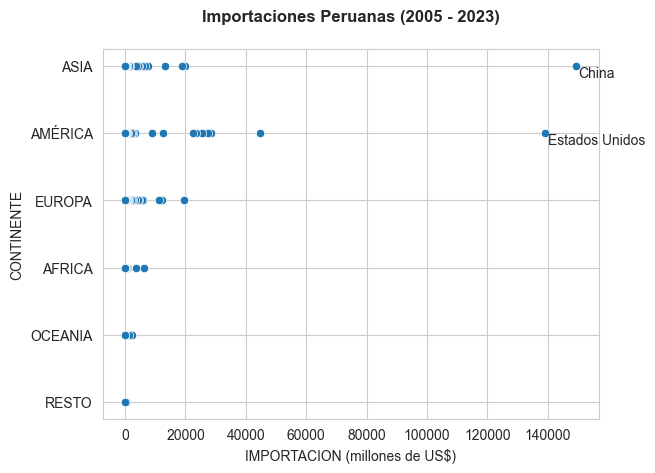

In [22]:
sns.scatterplot(data=importacion_pais, x='IMPORTACION (millones de US$)', y='CONTINENTE')
plt.text(150000, 'ASIA','China', va='top')
plt.text(140000,'AMÉRICA','Estados Unidos', va='top')
plt.title('Importaciones Peruanas (2005 - 2023)', fontweight='bold', pad=20)
plt.show()

**Despues de China y EEUU le siguen en importancia: Brasil, Argentina, Mexico, Ecuador, Colombia, Chile, Japon y Alemania**

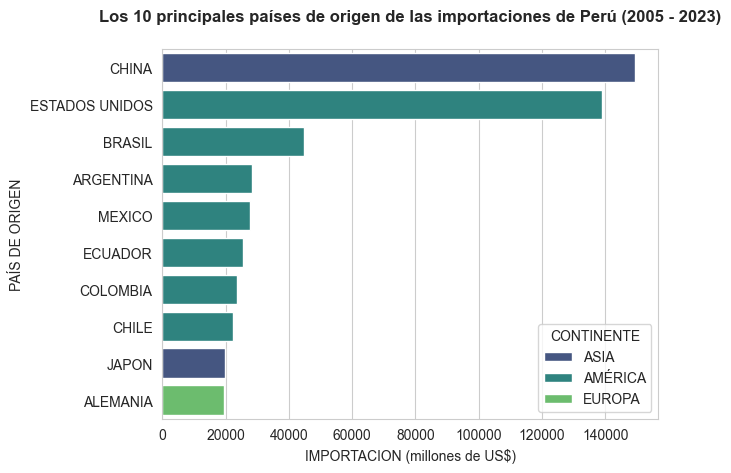

In [23]:
importacion_pais_top_10 = importacion_pais.head(10)

sns.barplot(data=importacion_pais_top_10, x='IMPORTACION (millones de US$)', y='PAÍS DE ORIGEN', 
            hue='CONTINENTE', palette='viridis')
plt.title('Los 10 principales países de origen de las importaciones de Perú (2005 - 2023)', 
          fontweight='bold', pad=20)
plt.show()

### ¿Cuál ha sido la evolución de las importaciones peruanas provenientes de China y Estados Unidos? 

**En términos generales, ambas han experimentado un crecimiento. Hasta el año 2013, las importaciones peruanas desde Estados Unidos superaban a las provenientes de China. Sin embargo, a partir de 2014, la tendencia se invirtió, y las importaciones peruanas desde China han superado consistentemente a las importaciones desde Estados Unidos.**

Seleccionamos las filas correspondientes a los paises de China y Estados Unidos

In [24]:
importaciones_china_eeuu = importacion_peru[importacion_peru['PAÍS DE ORIGEN'].isin(['CHINA','ESTADOS UNIDOS'])]


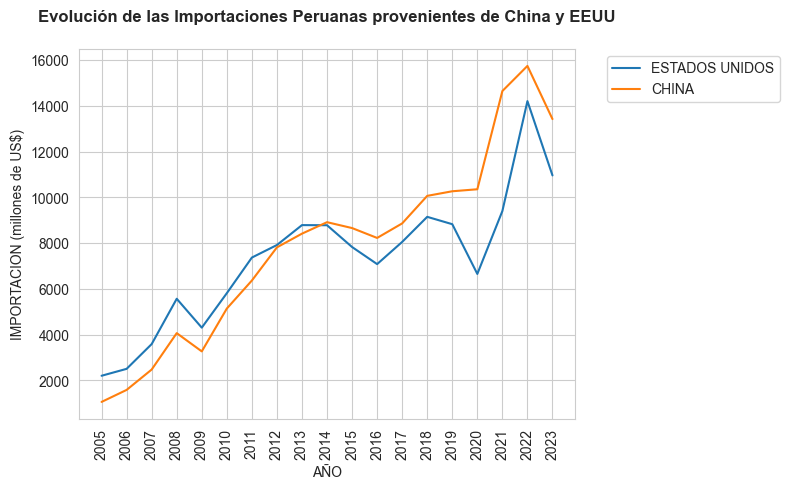

In [13]:
sns.lineplot(data=importaciones_china_eeuu, x='AÑO', y='IMPORTACION (millones de US$)', hue='PAÍS DE ORIGEN')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Evolución de las Importaciones Peruanas provenientes de China y EEUU', fontweight='bold', pad=20)
plt.xticks(importaciones_china_eeuu['AÑO'].unique(), rotation=90)
plt.show()